In [2]:
# Install required packages (fast)
!pip install -q scikit-learn matplotlib seaborn pandas joblib


In [3]:
import os
os.makedirs("outputs", exist_ok=True)   # <- prevents FileNotFoundError when saving
print("outputs/ folder ready")


outputs/ folder ready


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Accuracy: 0.8889

Classification report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



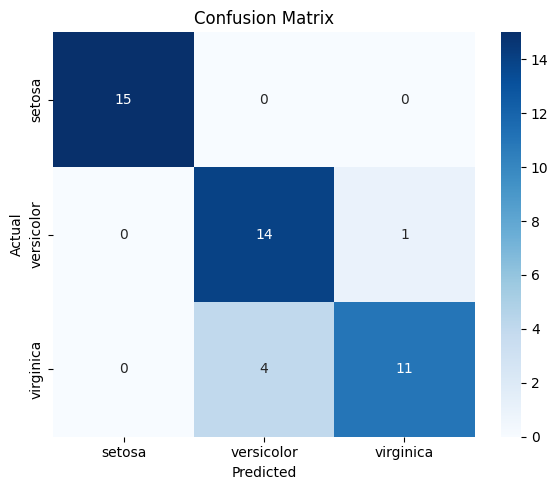

Saved confusion matrix to: outputs/task2_confusion_matrix.png
Saved classification report to: outputs/task2_classification_report.csv
Saved trained model to: outputs/task2_random_forest.joblib

Unique identifier: TASK2-JahnviKhurana-20050430


In [4]:
# Task 2 — Predictive ML (Iris classification) — Jahnvi Khurana
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import os

# 1. Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
display(df.head())

# 2. Prepare features/target
X = df[iris.feature_names]
y = df['species']

# 3. Train/test split (stratify preserves class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 4. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Predict & evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print("Classification report:\n")
print(classification_report(y_test, y_pred))

# 6. Confusion matrix plot (and save)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()

# ensure outputs exists (redundant but safe)
os.makedirs("outputs", exist_ok=True)
png_path = "outputs/task2_confusion_matrix.png"
plt.savefig(png_path)
plt.show()
print(f"Saved confusion matrix to: {png_path}")

# 7. Save classification report as CSV
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
csv_report_path = "outputs/task2_classification_report.csv"
report_df.to_csv(csv_report_path, index=True)
print(f"Saved classification report to: {csv_report_path}")

# 8. Save the trained model
model_path = "outputs/task2_random_forest.joblib"
joblib.dump(model, model_path)
print(f"Saved trained model to: {model_path}")

# 9. Unique identifier
print("\nUnique identifier: TASK2-JahnviKhurana-20050430")


In [5]:

feat_imp = pd.Series(model.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
print("Feature importances:\n", feat_imp)
feat_imp.to_csv("outputs/task2_feature_importances.csv")
print("Saved feature importances to outputs/task2_feature_importances.csv")


Feature importances:
 petal width (cm)     0.454892
petal length (cm)    0.400227
sepal length (cm)    0.120608
sepal width (cm)     0.024273
dtype: float64
Saved feature importances to outputs/task2_feature_importances.csv
